# 2021S AML-3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm as tq
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [179]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

In [180]:
trainingset.shape

(28709, 2311)

## Split data

In [181]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training_shaped = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing_shaped = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [182]:
# Converting y to 3 (happy) or 4(sad)
y_training = np.argmax(y_training, axis=1)
y_testing = np.argmax(y_testing, axis=1)

In [183]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

### [1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [185]:
# Creating a new datasets that include only happy (3) and sad(4) classes 
trainlabel = np.argmax(trainingset[:,-7:], axis=1)
testlabel = np.argmax(testingset[:,-7:], axis=1)
trainingset1 = trainingset[np.where((trainlabel == 3) | (trainlabel == 4))]
testingset1 = testingset[np.where((testlabel == 3) | (testlabel == 4))]

print('Original training set shape:', trainingset.shape)
print('New training set shape:', trainingset1.shape)

print('\nOriginal Testing set shape:', testingset.shape)
print('New Testing set shape:', testingset1.shape)

Original training set shape: (28709, 2311)
New training set shape: (12045, 2311)

Original Testing set shape: (3589, 2311)
New Testing set shape: (1548, 2311)


In [186]:
# Split the data
n_inputs = 2304 
n_classes = 7 
img_dim = 48 

x_training = trainingset1[:, 0:n_inputs]
y_training = trainingset1[:, n_inputs:n_inputs + n_classes]

x_testing = testingset1[:, 0:n_inputs] 
y_testing = testingset1[:, n_inputs:n_inputs + n_classes]

In [187]:
# Converting y to 3 (happy) or 4(sad)
y_training = np.argmax(y_training, axis=1)
y_testing = np.argmax(y_testing, axis=1)

### [4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

### PCA

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scale
x_training = StandardScaler().fit_transform(x_training)
x_testing = StandardScaler().fit_transform(x_testing)

# apply pca
pca = PCA()
x_training_p = pca.fit_transform(x_training)
x_testing_p = pca.transform(x_testing)

# Creating a copy to apply in part 2
pca_plot_happy_sad = PCA()
pca_plot_hs = pca_plot_happy_sad.fit(x_training)

print('Original Training count', x_training.shape)
print('PCA data count', x_training_p.shape)
print('\nOriginal Testing count', x_testing.shape)
print('PCA data count', x_testing_p.shape)

Original Training count (12045, 2304)
PCA data count (12045, 2304)

Original Testing count (1548, 2304)
PCA data count (1548, 2304)


In [189]:
# Taking the first 24 columns of the data_pca as our pricinpal components
x_training_p = x_training_p[:, :24]
x_testing_p = x_testing_p[:, :24]
print('PCA training shape:', x_training_p.shape)
print('PCA testing shape:', x_testing_p.shape)

PCA training shape: (12045, 24)
PCA testing shape: (1548, 24)


### [2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [190]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_training_p, y_training)
y_pred_gnb = gnb.predict(x_testing_p)

print("GaussianNB score:", round((accuracy_score(y_testing,y_pred_gnb) * 100), 2))### 

GaussianNB score: 63.18


### [2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [191]:
from sklearn.linear_model import LogisticRegression

lreg_all = LogisticRegression()
lreg_all.fit(x_training_p, y_training)
y_pred_lr = lreg_all.predict(x_testing_p)

print("Logistic Regression score:", round((accuracy_score(y_testing,y_pred_lr) * 100), 2))

Logistic Regression score: 68.09


### [2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [192]:
from sklearn.svm import SVC 

svclassifier_gaussian = SVC(kernel='rbf')  
svclassifier_gaussian.fit(x_training_p, y_training)
y_pred_svcgs = svclassifier_gaussian.predict(x_testing_p)
print("SVC Gaussian score:", round((accuracy_score(y_testing,y_pred_svcgs) * 100), 2))

SVC Gaussian score: 71.45


### [1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

YOUR ANSWER HERE

### [2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [193]:
### # YOUR CODE HERE

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

### [4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

### Reloading datasets

In [194]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

In [195]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below

x_training = trainingset[:, 0:n_inputs] 
y_training = trainingset[:, n_inputs:n_inputs + n_classes] 

x_testing = testingset[:, 0:n_inputs] 
y_testing = testingset[:, n_inputs:n_inputs + n_classes] 

y_training_images = y_training
y_training = np.argmax(y_training, axis=1)
y_testing = np.argmax(y_testing, axis=1)

# scaling datasets
x_training = StandardScaler().fit_transform(x_training)
x_testing = StandardScaler().fit_transform(x_testing)

### Apply PCA and LDA to represent the faces, display a sample of a few faces for each case
### PCA - applying and printing images

In [196]:
# apply PCA

from sklearn.decomposition import PCA

pca = PCA()
x_training_p = pca.fit_transform(x_training)
x_testing_p = pca.transform(x_testing)

print('Original Training count', x_training.shape)
print('PCA data count', x_training_p.shape)
print('\nOriginal Testing count', x_testing.shape)
print('PCA data count', x_testing_p.shape)

Original Training count (28709, 2304)
PCA data count (28709, 2304)

Original Testing count (3589, 2304)
PCA data count (3589, 2304)


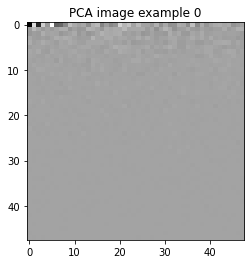

Facial emotion: happy


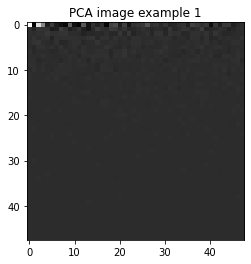

Facial emotion: fear


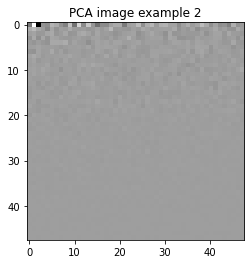

Facial emotion: fear


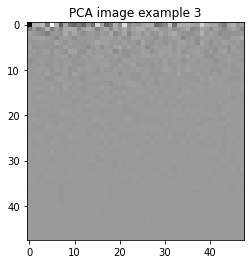

Facial emotion: sad


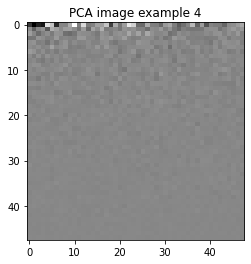

Facial emotion: neutral


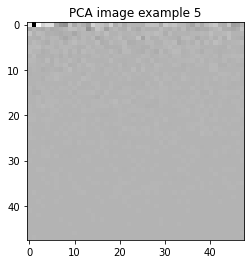

Facial emotion: neutral


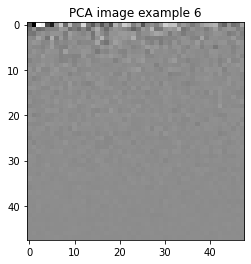

Facial emotion: neutral


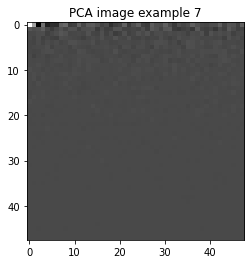

Facial emotion: disgust


In [197]:
for i in range(8):
    sampleindex = np.random.randint(0, 1000)
    sample = x_training_p[sampleindex, :2304]
    sample = sample.reshape(48, 48)
    plt.imshow(sample, cmap='gray')
    plt.title('PCA image example {}'.format(i))
    plt.show()
    print('Facial emotion: %s' % get_emotion(y_training_images[sampleindex]))

### LDA - applying and printing images

In [198]:
# YOUR CODE

### PCA - Produce a plot for PCA showing the cumulative variance captured by adding additional principal components. On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [199]:
pca_plot = PCA()
pca_plot = pca_plot.fit(x_training)

In [200]:
def display_plot(pca_1, pca_2):
    scree_1 = pca_1.explained_variance_ratio_*100
    scree_2 = pca_2.explained_variance_ratio_*100
    plt.figure(figsize=(16, 12))
    plt.bar(np.arange(len(scree_1))+1, scree_1)
    plt.plot(np.arange(len(scree_1))+1, scree_1.cumsum(), c="red", marker='o', markersize=12)
    plt.plot(np.arange(len(scree_2))+1, scree_2.cumsum(), c="blue", marker='*', markersize=6)
    
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Cumulative Variance plot: all classes (red) x happy and sad (blue)")
    
    plt.show(block=False)

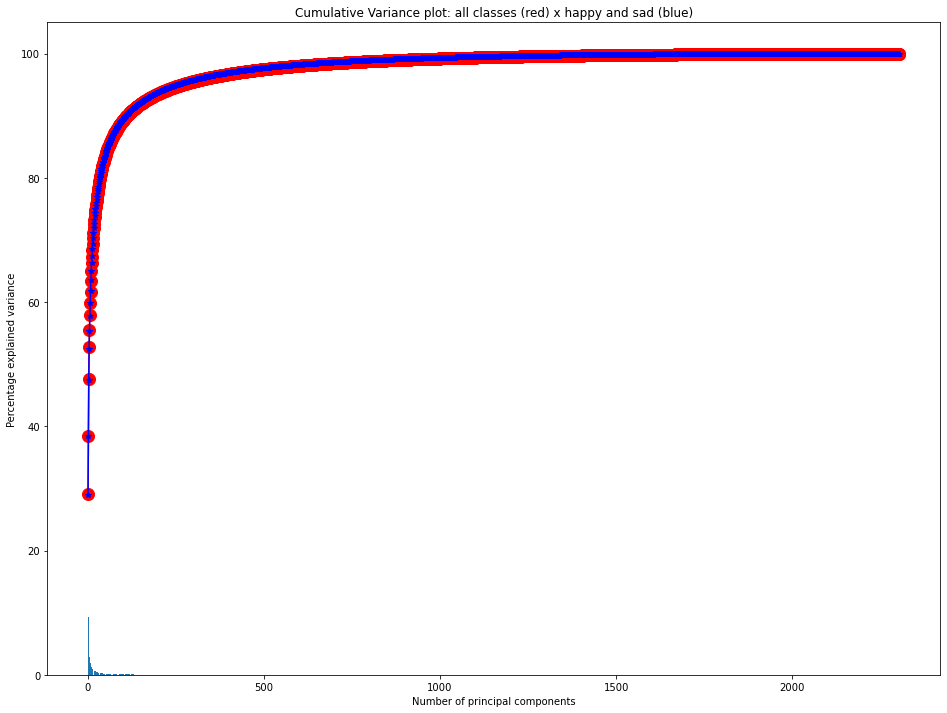

In [201]:
display_plot(pca_plot, pca_plot_hs)

### [2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [202]:
# # Taking the first 24 columns of the data_pca as our pricinpal components
# x_training_p = x_training_p[:, :24]
# x_testing_p = x_testing_p[:, :24]
# print('PCA training shape:', x_training_p.shape)
# print('PCA testing shape:', x_testing_p.shape)

In [203]:
# training a Naive Bayes classifier

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


nb_accuracy_list = []
nb_num_components_list = []
for i in tq(range(5, 200)):    
    num_components = i
    nb_num_components_list.append(num_components)
    
    new_x_training = x_training_p[:, :i]
    new_x_testing = x_testing_p[:, :i]
    
    gnb = GaussianNB()
    gnb.fit(new_x_training, y_training)
    y_pred_gnb = gnb.predict(new_x_testing)
    accuracy = round((accuracy_score(y_testing, y_pred_gnb) * 100), 2)
    nb_accuracy_list.append(accuracy)

100%|██████████| 195/195 [00:31<00:00,  6.23it/s]


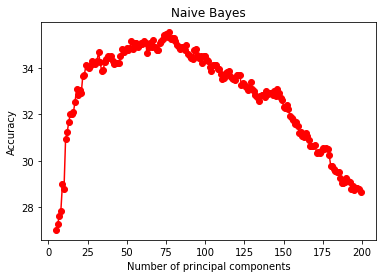

In [204]:
plt.plot(nb_num_components_list, nb_accuracy_list, c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Accuracy")
plt.title("Naive Bayes")
plt.show(block=False)

In [205]:
import operator
max_index, max_value = max(enumerate(nb_accuracy_list), key=operator.itemgetter(1))
nb_principal_component = nb_num_components_list[max_index]
print('The highest accuracy with GaussianNB and {} principal components was {}%!'.format(nb_principal_component, max_value))

The highest accuracy with GaussianNB and 77 principal components was 35.53%!


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

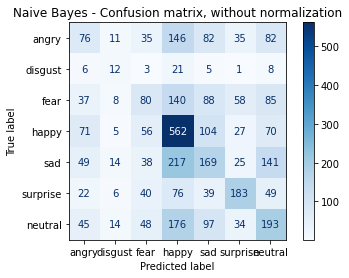

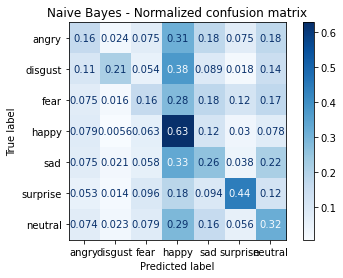

In [150]:
from sklearn.metrics import plot_confusion_matrix

new_x_training = x_training_p[:, :nb_principal_component]
new_x_testing = x_testing_p[:, :nb_principal_component]

gnb = GaussianNB()
classifier = gnb.fit(new_x_training, y_training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Naive Bayes - Confusion matrix, without normalization", None),
                  ("Naive Bayes - Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, new_x_testing, y_testing,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

### [2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [60]:
# training a Naive Bayes classifier
from sklearn.linear_model import LogisticRegression

lreg_accuracy_list = []
lreg_num_components_list = []
for i in tq(range(5, 200)):    
    num_components = i
    lreg_num_components_list.append(num_components)
    
    new_x_training = x_training_p[:, :i]
    new_x_testing = x_testing_p[:, :i]
    
    lreg_all = LogisticRegression(solver='liblinear')
    lreg_all.fit(new_x_training, y_training)
    y_pred_lr = lreg_all.predict(new_x_testing)
    accuracy = round((accuracy_score(y_testing, y_pred_lr) * 100), 2)
    
    lreg_accuracy_list.append(accuracy)

100%|██████████| 195/195 [31:42<00:00,  9.75s/it]


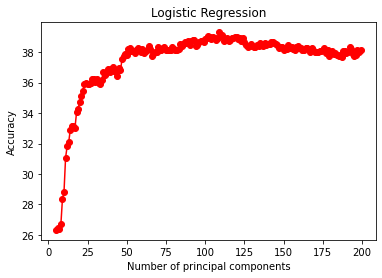

In [147]:
plt.plot(lreg_num_components_list, lreg_accuracy_list, c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Accuracy")
plt.title("Logistic Regression")
plt.show(block=False)

In [149]:
import operator
max_index, max_value = max(enumerate(lreg_accuracy_list), key=operator.itemgetter(1))
lreg_principal_component = lreg_num_components_list[max_index]
print('The highest accuracy with Logistic Regression and {} principal components was {}%!'.format(lreg_principal_component, max_value))

The highest accuracy with Logistic Regression and 109 principal components was 39.31%!


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

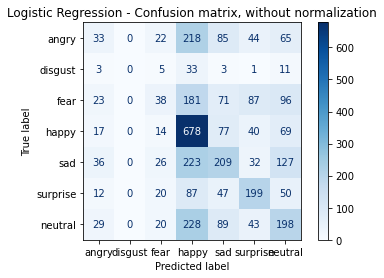

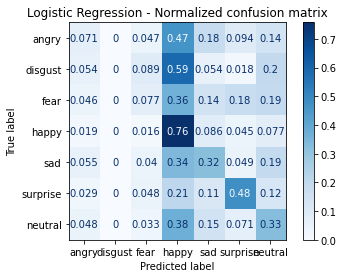

In [80]:
new_x_training = x_training_p[:, :lreg_principal_component]
new_x_testing = x_testing_p[:, :lreg_principal_component]

lreg_all = LogisticRegression(solver='liblinear')
classifier = lreg_all.fit(new_x_training, y_training)

class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression - Confusion matrix, without normalization", None),
                  ("Logistic Regression - Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, new_x_testing, y_testing,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

### [2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [136]:
from sklearn.svm import SVC 

svc_accuracy_list  = []
svc_num_components_list = []
for i in tq(components_to_test):    
    num_components = i
    svc_num_components_list_2.append(num_components)
    
    new_x_training = x_training_p[:, :i]
    new_x_testing = x_testing_p[:, :i]
    
    svclassifier_gaussian = SVC(kernel='rbf')  
    svclassifier_gaussian.fit(new_x_training, y_training)
    y_pred_svcgs = svclassifier_gaussian.predict(new_x_testing)
    accuracy = round((accuracy_score(y_testing, y_pred_svcgs) * 100), 2)    
    svc_accuracy_list_2.append(accuracy)

100%|██████████| 26/26 [9:27:18<00:00, 1309.16s/it]  


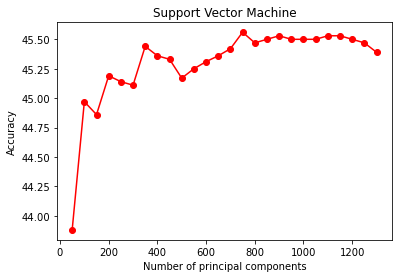

In [137]:
plt.plot(svc_num_components_list, svc_accuracy_list, c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Accuracy")
plt.title("Support Vector Machine")
plt.show(block=False)

In [139]:
import operator
max_index, max_value = max(enumerate(svc_accuracy_list), key=operator.itemgetter(1))
svc_principal_component = svc_num_components_list[max_index]
print('The highest accuracy with Support Vector Machine and {} principal components was {}%!'.format(svc_principal_component, max_value))

The highest accuracy with Support Vector Machine and 750 principal components was 45.56%!


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

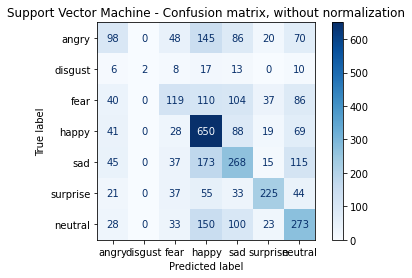

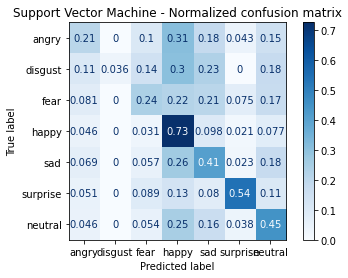

In [142]:
new_x_training = x_training_p[:, :svc_principal_component]
new_x_testing = x_testing_p[:, :svc_principal_component]

svclassifier_gaussian = SVC(kernel='rbf')
classifier = svclassifier_gaussian.fit(new_x_training, y_training)

class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Support Vector Machine - Confusion matrix, without normalization", None),
                  ("Support Vector Machine - Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, new_x_testing, y_testing,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

### [2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

### [4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [18]:
# YOUR CODE HERE

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [19]:
# YOUR CODE HERE